In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analytic-hackthon/sample_submission_tbPU9qQ.csv
/kaggle/input/analytic-hackthon/train_LZV4RXX.csv
/kaggle/input/analytic-hackthon/test_4zJg83n.csv


In [2]:
# library
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement

MyHom is a finance company that lends housing loans at the best and most affordable interest rates to customers. In recent times, the company incurred heavy losses due to loan defaults. Most applicants failed to repay the loan as per the promissory note.


In order to avoid such losses, the company has decided to build a system for identifying the loan defaulters automatically based on data. This will help the company to identify the potential applicants and ensure the smooth running of the entire process.


Now, the company challenges the Data Science community to build a smart AI system to predict the probability of an applicant defaulting the loan or not in the future.

## Loan Default Prediction

Can you predict if an applicant will default the loan or not in the future?

## Variable Discription

| Variable                        | Description                                                 |
| ------------------------------- | ----------------------------------------------------------- |
| loan\_id                        | Unique identifier of a loan                                 |
| age                             | Age of the Applicant                                        |
| Education                       | Applicant Education                                         |
| proof\_submitted                | Type of proof submitted                                     |
| loan\_amount                    | Loan Amount Disbursed                                       |
| asset\_cost                     | The total asset value of the applicant                      |
| no\_of\_loans                   | No. of the loans taken by the applicant                     |
| no\_of\_curr\_loans             | No. of active loans held by the applicant                   |
| last\_delinq\_none              | The loan defaulted in at least one of the past loans        |
| loan\_default (Target Variable) | 0/1 indicating if an applicant will default the loan or not |

## Evaluation metric


The evaluation metric for this hackathon would be the macro F1 Score.

In [3]:
filepath_train = '/kaggle/input/analytic-hackthon/train_LZV4RXX.csv'
filepath_test = '/kaggle/input/analytic-hackthon/test_4zJg83n.csv'
filepath_submission = '/kaggle/input/analytic-hackthon/sample_submission_tbPU9qQ.csv'

In [4]:
train_df = pd.read_csv(filepath_train)
test_df = pd.read_csv(filepath_test)
submission_df = pd.read_csv(filepath_submission)

In [5]:
train_df.shape

(7000, 10)

In [6]:
train_df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [7]:
train_df.tail()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
6995,6996,45,2.0,Aadhar,930948,1258344,0,0,0,1
6996,6997,41,2.0,Aadhar,681108,791040,4,4,0,1
6997,6998,47,2.0,Aadhar,627636,720336,35,11,0,1
6998,6999,39,1.0,Aadhar,654708,793860,0,0,0,1
6999,7000,31,1.0,Aadhar,705108,900660,0,0,0,0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


 #   Column            Non-Null Count  Dtype  change
---  ------            --------------  -----  -----
 0   loan_id           7000 non-null   int64  cat
 
 1   age               7000 non-null   int64  int
 
 2   education         6755 non-null   float64 cat
 
 3   proof_submitted   7000 non-null   object cat
 
 4   loan_amount       7000 non-null   int64  int
 
 5   asset_cost        7000 non-null   int64  int
 
 6   no_of_loans       7000 non-null   int64  cat
 
 7   no_of_curr_loans  7000 non-null   int64  cat
 
 8   last_delinq_none  7000 non-null   int64  cat
 
 9   loan_default      7000 non-null   int64  cat
 

In [9]:
cat_column = ['loan_id', 'education', 'proof_submitted', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none','loan_default']
for cat in cat_column:
    train_df[cat]=train_df[cat].astype('category')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   loan_id           7000 non-null   category
 1   age               7000 non-null   int64   
 2   education         6755 non-null   category
 3   proof_submitted   7000 non-null   category
 4   loan_amount       7000 non-null   int64   
 5   asset_cost        7000 non-null   int64   
 6   no_of_loans       7000 non-null   category
 7   no_of_curr_loans  7000 non-null   category
 8   last_delinq_none  7000 non-null   category
 9   loan_default      7000 non-null   category
dtypes: category(7), int64(3)
memory usage: 535.4 KB


<AxesSubplot:>

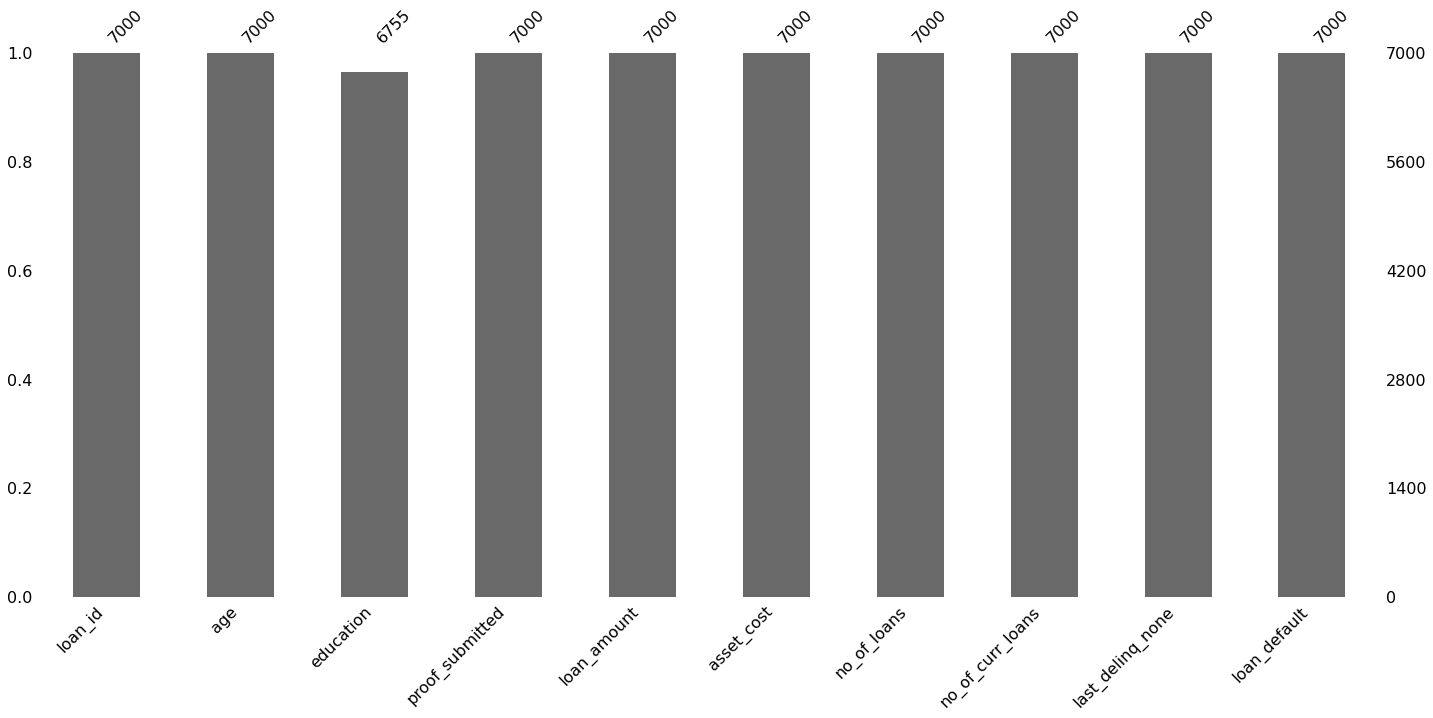

In [10]:
msno.bar(train_df)
# missing value present in education

<AxesSubplot:>

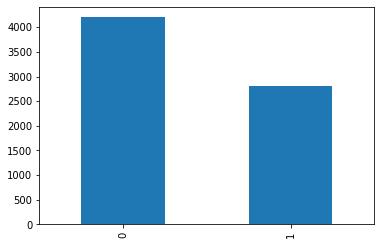

In [11]:
train_df['loan_default'].value_counts().plot(kind ='bar')